# **Trimm Outliers**
Trimming outliers means remove all outliers from the dataset. Which is a very quick approach. In this process we may lose information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plot 
import scipy.stats as stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Import dataset 
from sklearn.datasets import load_boston

# Load Boston House price dataset
data = pd.DataFrame(load_boston().data, columns = load_boston().feature_names)

# Target variable 
data['MEDV'] = load_boston().target

data = data[['RM', 'LSTAT', "CRIM"]]
data.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [0]:
# Create a function to plot histogram, Q-Q plot and boxplot
def create_plots(df, var):
  plt.subplots(figsize=(16,4))

  # histogram 
  plt.subplot(1, 3, 1)
  sns.distplot(df[var], bins = 30)
  plt.title('Histogram')

  # Q-Q plot
  plt.subplot(1, 3, 2)
  stats.probplot(df[var], dist = 'norm', plot=plt)
  plt.ylabel('Variable  quantiles')

  # Boxplot
  plt.subplot(1, 3, 3)
  sns.boxplot(y = df[var])
  plt.title('Boxplot')

  plt.show()

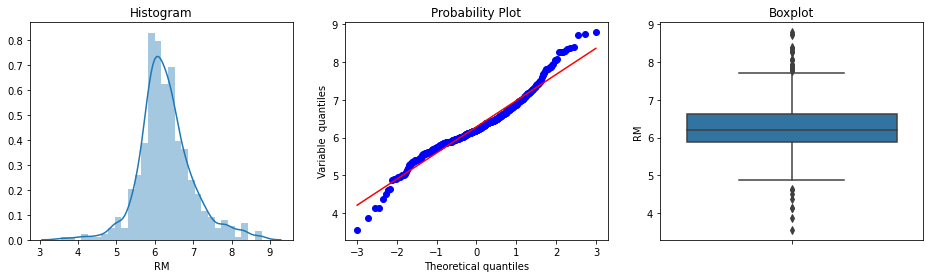

In [4]:
create_plots(data, 'RM')

We can see outliers clearly. Lets try to handel them.

In [0]:
# Find out the skewed data points (outlier's)
def find_outliers(df, var, distance):
  # Calculate the bounderies outside which sut the outliers.

  IQR = df[var].quantile(0.75) - df[var].quantile(.25)

  lower_boundery = df[var].quantile(.25) - (IQR * distance)
  upper_boundery = df[var].quantile(.75) + (IQR * distance)

  return lower_boundery, upper_boundery

In [6]:
# Find limits for RM
RM_lower_boundery, RM_upper_boundery = find_outliers(data, 'RM', 1.5)
RM_lower_boundery, RM_upper_boundery

(4.778500000000001, 7.730499999999999)

In [0]:
# Create a mask of outliers in the dataset
outliers_RM = np.where(data.RM > RM_upper_boundery, True, np.where(data.RM < RM_lower_boundery, True, False))

In [8]:
# Trimm outliers from the dataset.
data_trimm = data.loc[~(outliers_RM), ]
data.shape, data_trimm.shape

((506, 3), (476, 3))

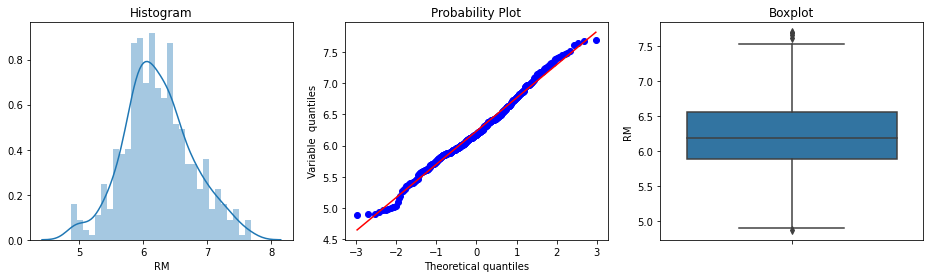

In [9]:
create_plots(data_trimm, 'RM')

# **Capping with IQR Proximity Rule**
Also known as censoring.  Capping or censoring means capping the maximum and/or minimum of a distribution at an arbitrary value. It does not remove data. Also it distorts the distributions of the variables and the relationships among variables.

In [0]:
# Use capping with IQR Proximity Rule on 'RM" column
data['RM'] = np.where(data.RM > RM_upper_boundery, RM_upper_boundery, np.where(data.RM < RM_lower_boundery, RM_lower_boundery, data.RM))

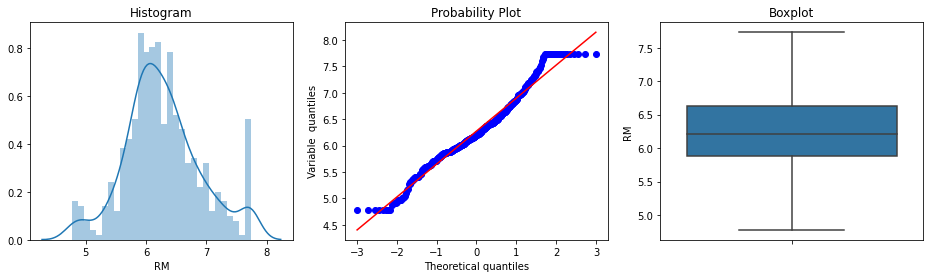

In [11]:
# create plot adter capping outliers 
create_plots(data, 'RM')

# **Capping with Gaussian Approximation**


In [0]:
# Load Boston House price dataset
data1 = pd.DataFrame(load_boston().data, columns = load_boston().feature_names)

# Target variable 
data1['MEDV'] = load_boston().target

data1 = data1[['RM', 'LSTAT', "CRIM"]]

In [0]:
# Find outliers limits using gaussian distribution
def find_gussdist(df, var, distance):
  upper_bound = df[var].mean() + distance * df[var].std()
  lower_bound = df[var].mean() - distance * df[var].std()
  return upper_bound, lower_bound

In [14]:
# limits of RM
rm_upper_bound, rm_lower_bound  = find_gussdist(data1, 'RM', 3)
rm_upper_bound, rm_lower_bound

(8.392485817597757, 4.176782957105816)

In [0]:
# Replace the outliers by the upper and lower bounds 
data1['RM'] = np.where(data1.RM > rm_upper_bound, rm_upper_bound, np.where(data1.RM < rm_lower_bound, rm_lower_bound, data1.RM))

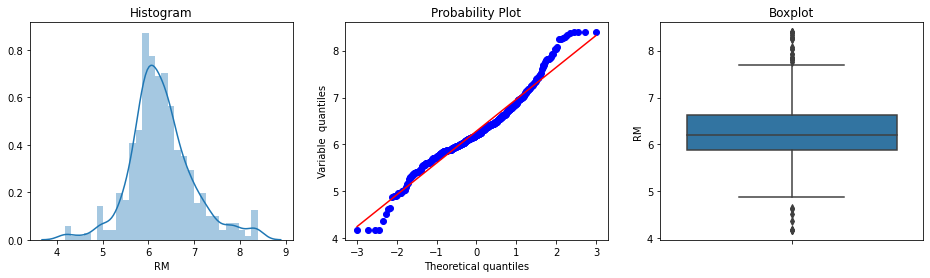

In [16]:
# Create plots after outliers replacing 
create_plots(data1, 'RM')

# **Capping with Quantiles**

In [0]:
# Load Boston House price dataset
data2 = pd.DataFrame(load_boston().data, columns = load_boston().feature_names)

# Target variable 
data2['MEDV'] = load_boston().target

data2 = data2[['RM', 'LSTAT', "CRIM"]]

In [0]:
# Find outliers limits using quantiles
def find_quant(df, var):
  upper_quant = df[var].quantile(0.95)
  lower_quant = df[var].quantile(0.05)
  return upper_quant, lower_quant

In [25]:
# Find boundaries for RM 
rm_upper_quant, rm_lower_quant = find_quant(data2, 'RM')
rm_upper_quant, rm_lower_quant

(7.5875, 5.314)

In [0]:
# Replace outliers by maximum and minumus limit
data2['RM'] = np.where(data2.RM > rm_upper_quant, rm_upper_quant, np.where(data2.RM < rm_lower_quant, rm_lower_quant, data.RM))

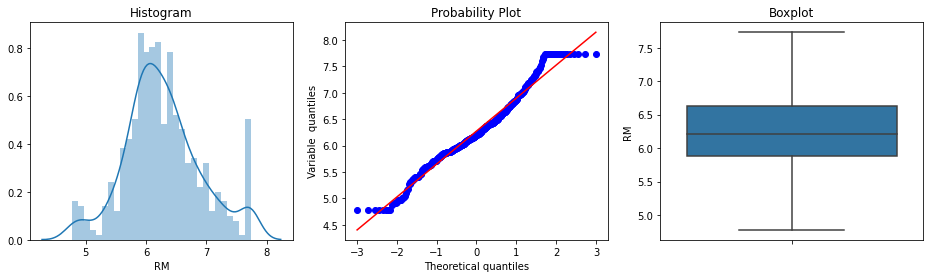

In [29]:
create_plots(data2, 'RM')